# LAB 4 - Image Segmentation

**Objectives:**

* Segment an image using various techniques:
    * Histograms
    * Texture
    * Region growing

## Histogram segmentation

1. Create a function to compute the optimal threshold for an 8 bit image. Apply on the cameraman image.
1. Compute the Otsu threshold for an 8-bit image, by optimizing within variance or inter-class variance for each possible theshold *t*. See [here](http://nbviewer.jupyter.org/github/odebeir/info-h-500-501/blob/ver_2016-2017/04-Image%20segmentation/01-Histogram%20based%20image%20segmentation.ipynb) how to compute the Otsu threshold.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.data import camera

im = camera()

In [2]:

# -- Your code here -- #


## Texture segmentation


Modifying the code below, segment the "zebra" image using its texture properties.

1. Use the "sliding window" method to compute, for patches of the image:
    * The co-occurrence matrix (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix))
    * The dissimilarity texture property (see [greycoprops](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycoprops))
2. Use this measure to segment the zebra image. Which angle & displacement should you use for the cooccurrence matrix?

C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


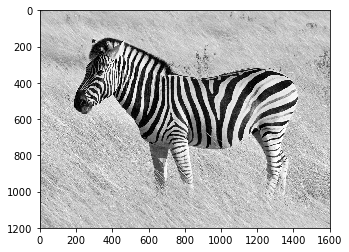

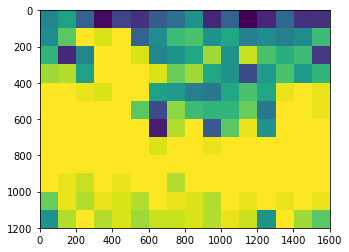

In [3]:
from skimage.feature import greycomatrix, greycoprops
from skimage.io import imread
from skimage import img_as_ubyte

# Open zebra image as an 8-bit integer grayscale
im = img_as_ubyte(imread("zebra.jpg", as_grey=True))
plt.figure()
plt.imshow(im, cmap=plt.cm.gray)
plt.show()


# Sliding window example
PATCH_SIZE = 100

output = np.zeros((im.shape[0], im.shape[1]))
for i in range(0, im.shape[0]-PATCH_SIZE+1, PATCH_SIZE):
    for j in range(0, im.shape[1]-PATCH_SIZE+1, PATCH_SIZE):
        patch = im[i:i+PATCH_SIZE, j:j+ PATCH_SIZE]
        output[i:i+PATCH_SIZE, j:j+ PATCH_SIZE] = patch.max()


# Cooccurrence matrix & properties:
#glcm = greycomatrix(patch, [displacement], [angle], 256)
#greycoprops(glcm, 'dissimilarity')[0, 0]

plt.figure()
plt.imshow(output)
plt.show()

## Region growing

**Starting from the example below:**
1. Find good markers for region growing in the peppers image.
1. Segment the peppers image using the watershed transform


Image shape: (299, 450, 4)
Min and max of alpha channel: 255 255


C:\Users\Administrateur\Anaconda2\envs\tf14\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


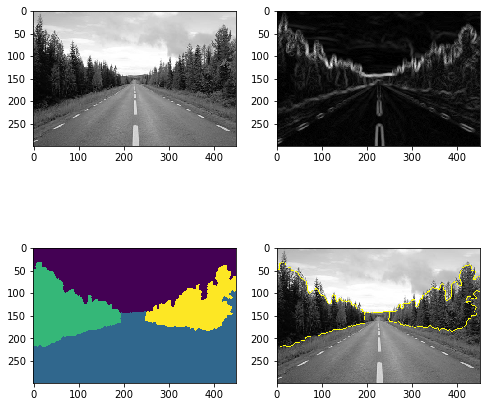

In [4]:
from skimage.morphology import watershed,disk
import skimage.filters.rank as skr
from skimage.segmentation import mark_boundaries
from skimage.color import rgb2gray
from skimage.io import imread

rgba = imread('http://homepages.ulb.ac.be/~odebeir/data/road.png')
print("Image shape:",rgba.shape) # We can see that this image has 4 channels : R,G,B and alpha (transparency)
# The transparency channel is not actually used as everything is set to 255.
print("Min and max of alpha channel:",rgba[:,:,3].min(), rgba[:,:,3].max()) 
# We only need the grayscale image
rgb = rgba[:,:,:3]
ima = rgb2gray(rgba)

# Pre-processing
smoothed = skr.mean(ima,disk(4))
gradient = skr.gradient(smoothed,disk(1))

# Hand-picked markers for the road image
marks = np.zeros_like(ima)

marks[50,200] = 1
marks[250,200] = 2
marks[150,100] = 3
marks[150,400] = 4

# Watershed transform
ws = watershed(gradient,marks)

plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plt.imshow(ima,cmap=plt.cm.gray);
plt.subplot(2,2,2)
plt.imshow(gradient,cmap=plt.cm.gray);
plt.subplot(2,2,3)
plt.imshow(ws);
plt.subplot(2,2,4)
plt.imshow(mark_boundaries(rgb,ws));

(480, 640, 3) 0 255


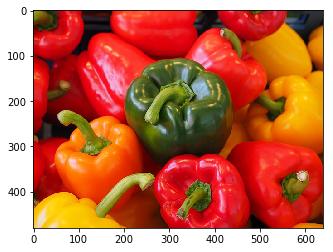

In [5]:
rgb = imread('http://homepages.ulb.ac.be/~odebeir/data/peppers.jpg')
print(rgb.shape,rgb.min(),rgb.max())
plt.figure()
plt.imshow(rgb)
plt.show()

# -- Your code here -- #


1. Compute the distance transform for the [separ.png](http://homepages.ulb.ac.be/~odebeir/data/separ.png) image, starting from the example code below.
1. Use the watershed transform to separate the three objects.

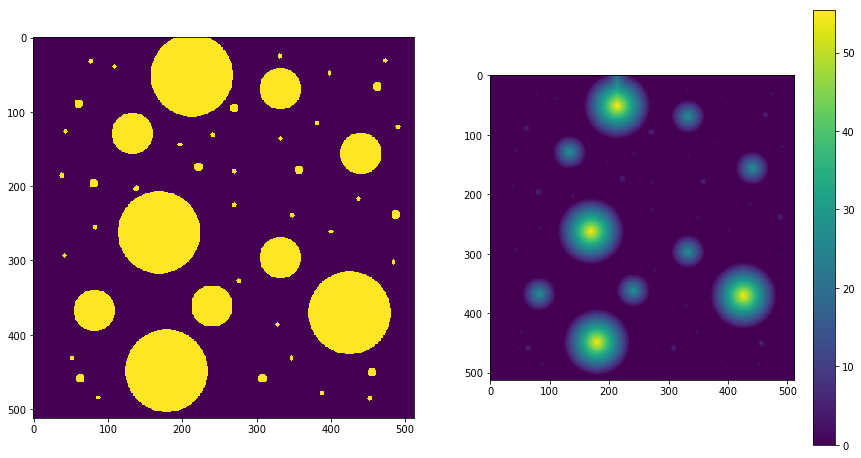

In [6]:
from scipy import ndimage as ndi

ima = imread('http://homepages.ulb.ac.be/~odebeir/data/circles1.png')==0 #to be sure objects are = 1

# compute the euclidian distance to the background
distance = ndi.distance_transform_edt(ima)

plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
plt.imshow(ima)
plt.subplot(1,2,2)
plt.imshow(distance)
plt.colorbar()
plt.show()

In [7]:

# -- Your code here -- #
